## Data Preparation

This Jupyter notebook is used to:

1. Clean the data (null values) and handle data types (such as timestamp).
2. One-Hot encode categorical features.
3. Standardize & Normalize continuous features.
4. Check correlations.
5. Write the result to single file, ready for ML model (model_*).

## 0. Load the data

In [1]:
# imports:
import pandas as pd
import matplotlib.pyplot as plt
import os

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'query_output_processing.csv'
print(INPUT_CSV)

raw_data = pd.read_csv(INPUT_CSV, low_memory=False)

# check that all columns are correctly loaded
raw_data.head()

/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/ddos/query_output_processing.csv


originated_ip    uid      connection.uid connection.conn_state  \
0  192.168.10.25  0x38e  CbRtRA1jAlvYFt6FAc                    SF   
1  192.168.10.25  0x38f   CEdEF344fHIVmwTxS                    SF   
2  192.168.10.25  0x395   Ctg4g21p7ckBMQ9Mf                    SF   
3  192.168.10.25  0x5db    CLEtWydt7YQw4Qsa                    S0   
4  192.168.10.25  0x70e  CXkKEV18mBlRiemoO2                    SF   

   connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0             0.816407                    699                      1647   
1            46.769639                   1113                      1801   
2            30.072889                    877                      1617   
3             1.001580                   1274                      2002   
4             0.031823                     58                       114   

   connection.orig_p  connection.orig_pkts connection.proto  ...  \
0              53668                    18              tcp  ...   
1              53701                    13              tcp  ...   
2              53724                    14              tcp  ...   
3               5353                    26              udp  ...   
4              53550                     2              udp  ...   

   resp_resp_similar_http_status_code_count  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   resp_resp_similar_http_user_agent_count  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   resp_resp_similar_ssl_version_count  resp_resp_similar_ssl_cipher_count  \
0                                    0                                   0   
1                                    0                                   0   
2                                    0                                   0   
3                                    0                                   0   
4                                    0                                   0   

  resp_resp_similar_ssl_curve_count  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

  resp_resp_similar_ssl_validation_status_count  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  resp_resp_similar_files_source_count  resp_resp_similar_file_md5_count  \
0                                    0                                 0   
1                                    0                                 0   
2                                    0                                 0   
3                                    0                                 0   
4                                    0                                 0   

   attacker_label  victim_label  
0              No            No  
1              No            No  
2              No            No  
3              No            No  
4              No            No  

[5 rows x 219 columns]

In [2]:
pd.set_option('display.max_columns', None)
raw_data

originated_ip       uid      connection.uid connection.conn_state  \
0       192.168.10.25     0x38e  CbRtRA1jAlvYFt6FAc                    SF   
1       192.168.10.25     0x38f   CEdEF344fHIVmwTxS                    SF   
2       192.168.10.25     0x395   Ctg4g21p7ckBMQ9Mf                    SF   
3       192.168.10.25     0x5db    CLEtWydt7YQw4Qsa                    S0   
4       192.168.10.25     0x70e  CXkKEV18mBlRiemoO2                    SF   
...               ...       ...                 ...                   ...   
116251     172.16.0.1  0x2f762c  CQhM1E2s4lpM9Hv4kd                  RSTO   
116252     172.16.0.1  0x2f762e  CFmwVl2WJiYK4bAJO4                  RSTO   
116253     172.16.0.1  0x2f7635  CbN6le4VGUXexTh6jh                  RSTO   
116254     172.16.0.1  0x2f7638  CNMmZj2438LiRbQF9a                  RSTO   
116255     172.16.0.1  0x2f7693  CngH4p3wXF9RX0bpSd                   OTH   

        connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0                  0.816407                    699                      1647   
1                 46.769639                   1113                      1801   
2                 30.072889                    877                      1617   
3                  1.001580                   1274                      2002   
4                  0.031823                     58                       114   
...                     ...                    ...                       ...   
116251             1.633477                     20                       312   
116252             1.604219                     20                       392   
116253             1.573830                     20                       272   
116254             0.111445                     20                       192   
116255            24.580082                    204                       316   

        connection.orig_p  connection.orig_pkts connection.proto  \
0                   53668                    18              tcp   
1                   53701                    13              tcp   
2                   53724                    14              tcp   
3                    5353                    26              udp   
4                   53550                     2              udp   
...                   ...                   ...              ...   
116251              65092                     7              tcp   
116252              65115                     9              tcp   
116253              65139                     6              tcp   
116254              51329                     4              tcp   
116255                  3                     4             icmp   

        connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
0                        7202                      8094                443   
1                         709                      1341                443   
2                        3402                      3866                443   
3                           0                         0               5353   
4                          90                       146                 53   
...                       ...                       ...                ...   
116251                  11595                     11767                 80   
116252                  11595                     11767                 80   
116253                  11595                     11847                 80   
116254                      0                        92                 80   
116255                      0                         0                  1   

        connection.resp_pkts connection.service                connection.ts  \
0                         17                ssl  2017-07-07T19:21:44.529744Z   
1                         12                ssl  2017-07-07T19:21:52.456551Z   
2                          9                ssl   2017-07-07T19:22:09.06327Z   
3                          0                dns 

### Frequency percentage of labels:

In [3]:
raw_data['attacker_label'].value_counts()

Yes    95708
No     20548
Name: attacker_label, dtype: int64

In [4]:
count_attacker = pd.value_counts(raw_data['attacker_label'])
count_victim = pd.value_counts(raw_data['victim_label'])
percentage_df = pd.DataFrame({'Class':['Yes', 'No'], 'Frequency Percentage':[min(count_victim['Yes'], count_attacker['Yes'])/len(raw_data), 
                                                                             (len(raw_data) - min(count_victim['Yes'], count_attacker['Yes']))/len(raw_data)]})

In [5]:
percentage_df

Class  Frequency Percentage
0   Yes              0.823252
1    No              0.176748

<AxesSubplot:xlabel='Class'>

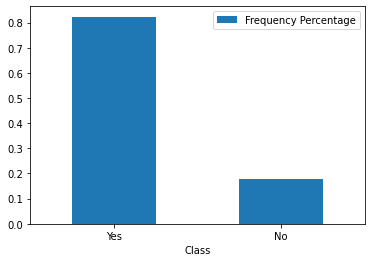

In [6]:
percentage_df.plot.bar(x='Class', y='Frequency Percentage', rot=0)

# Data cleaning & preparation

(https://www.keboola.com/blog/the-ultimate-guide-to-data-cleaning)

Possible problems:

1. Missing values (here only specific values in rows)
2. Data distribution (see more heavily represented ranges, check outliers)
3. Impossible values ("date == blue")
4. Data consistency (lower vs. uppercase)

### 1.0 Null values 

a) ignore

b) drop row/ column with these

c) fill in missing values

In [7]:
# clean garbage (null, NaN, ..)
pd.set_option('display.max_rows', None)
raw_data.isnull().sum()

originated_ip                                    0
uid                                              0
connection.uid                                   0
connection.conn_state                            0
connection.duration                              0
connection.orig_bytes                            0
connection.orig_ip_bytes                         0
connection.orig_p                                0
connection.orig_pkts                             0
connection.proto                                 0
connection.resp_bytes                            0
connection.resp_ip_bytes                         0
connection.resp_p                                0
connection.resp_pkts                             0
connection.service                               0
connection.ts                                    0
responded_ip                                     0
dns_count                                        0
ssh_count                                        0
http_count                     

In [8]:
pd.reset_option('display.max_rows')

In [9]:
raw_data[raw_data.isnull().any(axis=1)]

originated_ip       uid      connection.uid connection.conn_state  \
924  210.14.132.70  0x1265d2  CxWKbr4PzaETeLAKQe                   OTH   

     connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
924            93.267989                    608                       944   

     connection.orig_p  connection.orig_pkts connection.proto  \
924                  3                    12             icmp   

     connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
924                      0                         0                 10   

     connection.resp_pkts connection.service                connection.ts  \
924                     0               none  2017-07-07T19:00:59.040733Z   

     responded_ip  dns_count  ssh_count  http_count  ssl_count  files_count  \
924  192.168.10.9          0          0           0          0            0   

    dns_qtype dns_rcode ssh_auth_attempts ssh_host_key http_method  \
924       NaN       NaN               NaN          NaN         NaN   

    http_status_code http_user_agent ssl_version ssl_cipher ssl_curve  \
924              NaN             NaN         NaN        NaN       NaN   

    ssl_validation_status files_source file_md5 dns_dicts ssh_dicts  \
924                   NaN          NaN      NaN       NaN       NaN   

    http_dicts ssl_dicts files_dicts                   connection.time  \
924        NaN       NaN         NaN  2017-07-07 19:00:59.040733+00:00   

     orig_orig_total  orig_orig_proto_tcp_count  orig_orig_proto_udp_count  \
924                1                          0                          0   

     orig_orig_proto_icmp_count orig_orig_connection.protocol_mode  \
924                           1                               icmp   

    orig_orig_connection.service_mode orig_orig_connection.conn_state_mode  \
924                              none                                  OTH   

          orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
924  2017-07-07 19:00:59.040732928+00:00                           93.267989   

     orig_orig_connection.orig_bytes_mean  \
924                                 608.0   

     orig_orig_connection.orig_pkts_mean  \
924                                 12.0   

     orig_orig_connection.resp_bytes_mean  \
924                                   0.0   

     orig_orig_connection.resp_pkts_mean  orig_orig_orig_p_well_known_count  \
924                                  0.0                                  1   

     orig_orig_orig_p_reg_or_dyn_count  orig_orig_resp_p_21_count  \
924                                  0                          0   

     orig_orig_resp_p_22_count  orig_orig_resp_p_53_count  \
924                          0                          0   

     orig_orig_resp_p_80_count  orig_orig_resp_p_123_count  \
924                          0                           0   

     orig_orig_resp_p_443_count  orig_orig_resp_p_3389_count  \
924                           0                            0   

     orig_orig_resp_p_well_known_count  orig_orig_resp_p_reg_count  \
924                                  1                           0   

     orig_orig_resp_p_dyn_count  orig_orig_dns_count_mean  \
924                           0                       0.0   

     orig_orig_ssh_count_mean  orig_orig_http_count_mean  \
924                       0.0                        0.0   

     orig_orig_ssl_count_mean  orig_orig_files_count_mean  \
924                       0.0                         0.0   

     orig_orig_similar_conns_count  orig_orig_similar_dns_qtype_count  \
924                              0                                  0   

     orig_orig_similar_dns_rcode_count  \
924                                  0   

     orig_orig_similar_ssh_auth_attempts_count  \
924                                          0   

     orig_orig_similar_ssh_host_key_count  \
924                                     0   

     orig_orig_similar_http_met

In [10]:
raw_data['dns_qtype'].fillna('[]', inplace = True)
raw_data['dns_rcode'].fillna('[]', inplace = True)
raw_data['ssh_auth_attempts'].fillna('[]', inplace = True)
raw_data['ssh_host_key'].fillna('[]', inplace = True)
raw_data['http_method'].fillna('[]', inplace = True)
raw_data['http_status_code'].fillna('[]', inplace = True)
raw_data['http_user_agent'].fillna('[]', inplace = True)
raw_data['ssl_version'].fillna('[]', inplace = True)
raw_data['ssl_cipher'].fillna('[]', inplace = True)
raw_data['ssl_curve'].fillna('[]', inplace = True)
raw_data['ssl_validation_status'].fillna('[]', inplace = True)
raw_data['files_source'].fillna('[]', inplace = True)
raw_data['file_md5'].fillna('[]', inplace = True)
raw_data['dns_dicts'].fillna('[]', inplace = True)
raw_data['ssh_dicts'].fillna('[]', inplace = True)
raw_data['http_dicts'].fillna('[]', inplace = True)
raw_data['ssl_dicts'].fillna('[]', inplace = True)
raw_data['files_dicts'].fillna('[]', inplace = True)

In [11]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [originated_ip, uid, connection.uid, connection.conn_state, connection.duration, connection.orig_bytes, connection.orig_ip_bytes, connection.orig_p, connection.orig_pkts, connection.proto, connection.resp_bytes, connection.resp_ip_bytes, connection.resp_p, connection.resp_pkts, connection.service, connection.ts, responded_ip, dns_count, ssh_count, http_count, ssl_count, files_count, dns_qtype, dns_rcode, ssh_auth_attempts, ssh_host_key, http_method, http_status_code, http_user_agent, ssl_version, ssl_cipher, ssl_curve, ssl_validation_status, files_source, file_md5, dns_dicts, ssh_dicts, http_dicts, ssl_dicts, files_dicts, connection.time, orig_orig_total, orig_orig_proto_tcp_count, orig_orig_proto_udp_count, orig_orig_proto_icmp_count, orig_orig_connection.protocol_mode, orig_orig_connection.service_mode, orig_orig_connection.conn_state_mode, orig_orig_connection.time_mean, orig_orig_connection.duration_mean, orig_orig_connection.orig_bytes_mean, orig_orig_connection.orig_pkts_mean, orig_orig_connection.resp_bytes_mean, orig_orig_connection.resp_pkts_mean, orig_orig_orig_p_well_known_count, orig_orig_orig_p_reg_or_dyn_count, orig_orig_resp_p_21_count, orig_orig_resp_p_22_count, orig_orig_resp_p_53_count, orig_orig_resp_p_80_count, orig_orig_resp_p_123_count, orig_orig_resp_p_443_count, orig_orig_resp_p_3389_count, orig_orig_resp_p_well_known_count, orig_orig_resp_p_reg_count, orig_orig_resp_p_dyn_count, orig_orig_dns_count_mean, orig_orig_ssh_count_mean, orig_orig_http_count_mean, orig_orig_ssl_count_mean, orig_orig_files_count_mean, orig_orig_similar_conns_count, orig_orig_similar_dns_qtype_count, orig_orig_similar_dns_rcode_count, orig_orig_similar_ssh_auth_attempts_count, orig_orig_similar_ssh_host_key_count, orig_orig_similar_http_method_count, orig_orig_similar_http_status_code_count, orig_orig_similar_http_user_agent_count, orig_orig_similar_ssl_version_count, orig_orig_similar_ssl_cipher_count, orig_orig_similar_ssl_curve_count, orig_orig_similar_ssl_validation_status_count, orig_orig_similar_files_source_count, orig_orig_similar_file_md5_count, orig_resp_total, orig_resp_proto_tcp_count, orig_resp_proto_udp_count, orig_resp_proto_icmp_count, orig_resp_connection.protocol_mode, orig_resp_connection.service_mode, orig_resp_connection.conn_state_mode, orig_resp_connection.time_mean, orig_resp_connection.duration_mean, orig_resp_connection.orig_bytes_mean, orig_resp_connection.orig_pkts_mean, orig_resp_connection.resp_bytes_mean, orig_resp_connection.resp_pkts_mean, orig_resp_orig_p_well_known_count, orig_resp_orig_p_reg_or_dyn_count, ...]
Index: []

In [12]:
data = raw_data.copy()

### 1.1 Time

Convert `date` type to `timestamp`.

In [13]:
data['orig_orig_connection.time_mean'].describe()

count                                  116256
unique                                   5886
top       2017-07-07 18:58:46.139570432+00:00
freq                                      727
Name: orig_orig_connection.time_mean, dtype: object

In [14]:
# connection.ts is in RFC 3339, ISO 8601 date format
# convert values of 'connections.ts' column to timestamp

import dateutil.parser # https://stackoverflow.com/questions/127803/how-do-i-parse-an-iso-8601-formatted-date
from datetime import datetime


def date_to_timestamp(connection_ts):
  date_format = dateutil.parser.isoparse(connection_ts)
  timestamp = datetime.timestamp(date_format)
  return timestamp

data['connection.time'] = data['connection.time'].map(lambda x: date_to_timestamp(x))
data['orig_orig_connection.time_mean'] = data['orig_orig_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['orig_resp_connection.time_mean'] = data['orig_resp_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['resp_orig_connection.time_mean'] = data['resp_orig_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['resp_resp_connection.time_mean'] = data['resp_resp_connection.time_mean'].map(lambda x: date_to_timestamp(x))


data.head()

originated_ip    uid      connection.uid connection.conn_state  \
0  192.168.10.25  0x38e  CbRtRA1jAlvYFt6FAc                    SF   
1  192.168.10.25  0x38f   CEdEF344fHIVmwTxS                    SF   
2  192.168.10.25  0x395   Ctg4g21p7ckBMQ9Mf                    SF   
3  192.168.10.25  0x5db    CLEtWydt7YQw4Qsa                    S0   
4  192.168.10.25  0x70e  CXkKEV18mBlRiemoO2                    SF   

   connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0             0.816407                    699                      1647   
1            46.769639                   1113                      1801   
2            30.072889                    877                      1617   
3             1.001580                   1274                      2002   
4             0.031823                     58                       114   

   connection.orig_p  connection.orig_pkts connection.proto  \
0              53668                    18              tcp   
1              53701                    13              tcp   
2              53724                    14              tcp   
3               5353                    26              udp   
4              53550                     2              udp   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
0                   7202                      8094                443   
1                    709                      1341                443   
2                   3402                      3866                443   
3                      0                         0               5353   
4                     90                       146                 53   

   connection.resp_pkts connection.service                connection.ts  \
0                    17                ssl  2017-07-07T19:21:44.529744Z   
1                    12                ssl  2017-07-07T19:21:52.456551Z   
2                     9                ssl   2017-07-07T19:22:09.06327Z   
3                     0                dns  2017-07-07T19:00:26.688648Z   
4                     2                dns  2017-07-07T19:21:44.496311Z   

     responded_ip  dns_count  ssh_count  http_count  ssl_count  files_count  \
0  180.148.171.45          0          0           0          1            2   
1  66.235.138.194          0          0           0          1            0   
2   14.128.26.213          0          0           0          1            2   
3     224.0.0.251          1          0           0          0            0   
4    192.168.10.3          1          0           0          0            0   

  dns_qtype dns_rcode ssh_auth_attempts ssh_host_key http_method  \
0        []        []                []           []          []   
1        []        []                []           []          []   
2        []        []                []           []          []   
3      [28]    [None]                []           []          []   
4       [1]    [None]                []           []          []   

  http_status_code http_user_agent ssl_version  \
0               []              []  ['TLSv10']   
1               []              []  ['TLSv10']   
2               []              []  ['TLSv10']   
3               []              []          []   
4               []              []          []   

                             ssl_cipher ssl_curve ssl_validation_status  \
0  ['TLS_DHE_RSA_WITH_AES_128_CBC_SHA']    [None]                [None]   
1      ['TLS_RSA_WITH_AES_256_CBC_SHA']    [None]                [None]   
2      ['TLS_RSA_WITH_AES_128_CBC_SHA']    [None]                [None]   
3                                    []        []                    []   
4                                    []        []                    []   

  files_source                                           file_md5  \
0      ['SSL']  ['ef85e8600fc2a33d528ddfe48d03f5df', '342e1e02...   
1           []                                                 []   
2      ['SSL']  ['8c058c9

### Extract column names

In [15]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [16]:
selected_df = data[CONN_IDS_COLS +
                   CONN_NUMERICAL_COLS +
                   CONN_CATEGORICAL_COLS + 
                   CONN_APP_STATS +
                   ORIG_ORIG_NUMERICAL_COLS + 
                   ORIG_ORIG_CATEGORICAL_COLS +
                   ORIG_ORIG_PORTS_COLS + 
                   ORIG_ORIG_APP_STATS_COLS +
                   ORIG_ORIG_SIMILAR_COLS + 
                   ORIG_RESP_NUMERICAL_COLS + 
                   ORIG_RESP_CATEGORICAL_COLS + 
                   ORIG_RESP_PORTS_COLS + 
                   ORIG_RESP_APP_STATS_COLS + 
                   ORIG_RESP_SIMILAR_COLS + 
                   RESP_ORIG_NUMERICAL_COLS + 
                   RESP_ORIG_CATEGORICAL_COLS + 
                   RESP_ORIG_PORTS_COLS + 
                   RESP_ORIG_APP_STATS_COLS + 
                   RESP_ORIG_SIMILAR_COLS + 
                   RESP_RESP_NUMERICAL_COLS +
                   RESP_RESP_CATEGORICAL_COLS + 
                   RESP_RESP_PORTS_COLS +
                   RESP_RESP_APP_STATS_COLS +
                   RESP_RESP_SIMILAR_COLS +
                   BACKUP_COLS] # backup for later
selected_df.head(5)

connection.uid  originated_ip    responded_ip  connection.time  \
0  CbRtRA1jAlvYFt6FAc  192.168.10.25  180.148.171.45     1.499455e+09   
1   CEdEF344fHIVmwTxS  192.168.10.25  66.235.138.194     1.499455e+09   
2   Ctg4g21p7ckBMQ9Mf  192.168.10.25   14.128.26.213     1.499455e+09   
3    CLEtWydt7YQw4Qsa  192.168.10.25     224.0.0.251     1.499454e+09   
4  CXkKEV18mBlRiemoO2  192.168.10.25    192.168.10.3     1.499455e+09   

   connection.duration  connection.orig_p  connection.orig_bytes  \
0             0.816407              53668                    699   
1            46.769639              53701                   1113   
2            30.072889              53724                    877   
3             1.001580               5353                   1274   
4             0.031823              53550                     58   

   connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      1647                    18                443   
1                      1801                    13                443   
2                      1617                    14                443   
3                      2002                    26               5353   
4                       114                     2                 53   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   7202                      8094                    17   
1                    709                      1341                    12   
2                   3402                      3866                     9   
3                      0                         0                     0   
4                     90                       146                     2   

  connection.proto connection.service connection.conn_state  dns_count  \
0              tcp                ssl                    SF          0   
1              tcp                ssl                    SF          0   
2              tcp                ssl                    SF          0   
3              udp                dns                    S0          1   
4              udp                dns                    SF          1   

   ssh_count  http_count  ssl_count  files_count  orig_orig_total  \
0          0           0          1            2              137   
1          0           0          1            0              137   
2          0           0          1            2              137   
3          0           0          0            0               57   
4          0           0          0            0              137   

   orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
0                    1.499455e+09                           20.004277   
1                    1.499455e+09                           20.004277   
2                    1.499455e+09                           20.004277   
3                    1.499454e+09                            7.748941   
4                    1.499455e+09                           20.004277   

   orig_orig_connection.orig_pkts_mean  orig_orig_connection.orig_bytes_mean  \
0                            23.620438                           1893.437956   
1                            23.620438                           1893.437956   
2                            23.620438                           1893.437956   
3                             8.982456                            552.052632   
4                            23.620438                           1893.437956   

   orig_orig_connection.resp_bytes_mean  orig_orig_connection.resp_pkts_mean  \
0                          36563.277372                            27.131387   
1                          36563.277372                            27.131387   
2                          36563.277372                            27.131387   
3                            397.228070                             4.824561   
4                          36563.277372                            27.131387   

  orig_o

### 1.2 Handle IP addresses:

Possible approaches:

1. one-hot (but too many, vector will be too big + the information about "closer" IP addresses gets lost anyway)
2. somehow convert to a number so that the closeness is preserved 

In [17]:
# https://stackoverflow.com/questions/5619685/conversion-from-ip-string-to-integer-and-backward-in-python

import socket
import struct

def ip2int(addr):
  return struct.unpack("!I", socket.inet_aton(addr))[0]

def int2ip(addr):
  return socket.inet_ntoa(struct.pack("!I", addr))

# print(ip2int('9.6# 44.13'))
# print(ip2int('9.# .44.14'))
# print(ip2int('9# 6.45.14'))
# print(ip2int('9# 6.44.255'))
# print(ip2int('1# .66.44.13'))
# print(ip2# t('0.0.0.0'))
# print(ip2int('255.255.255.255'))

In [18]:
pd.options.mode.chained_assignment = None # for warning (I really do want to update the copy here)

selected_df['responded_ip_num'] = 0
selected_df['originated_ip_num'] = 0

for i in selected_df.index:
    try:
        selected_df.at[i, 'responded_ip_num'] = ip2int(selected_df.at[i, 'responded_ip'])
        selected_df.at[i, 'originated_ip_num'] = ip2int(selected_df.at[i, 'originated_ip'])
    except:
        print(i)
        print(selected_df.at[i, 'responded_ip'])
        print(selected_df.at[i, 'originated_ip'])
        selected_df.drop(i)

### 1.3 Handle ports:

Take in consideration external information:

Responded: 

- 21, 22, 53, 80, 123, 443, 3389
- 0 - 1023 *well known ports*
- 1024 - 49151 *registered*
- 49152 - 65535 *dynamic*

Originated: 

- 0 - 1023 *well known ports*
- 1024 - 49151 *registered*, 49152 - 65535 *dynamic*

==> create categories

One-hot encoding is useless again (too many possibilities), some have special meaning (20, 21 FTP; 80 HTTP; 110 POP3; ...), but for e.g. port scan it can be useful to also preserve that some ports are "close" to each other.


In [19]:
# 21, 22, 53, 80, 123, 443, 3389
# 0 - 1023 well known ports
# 1024 - 49151 registered
# 49152 - 65535 dynamic

common_ports_mapper = {
    21: 'resp_21',
    22: 'resp_22',
    53: 'resp_53',
    80: 'resp_80',
    123: 'resp_123',
    443: 'resp_443',
    3389: 'resp_3389',
}

def resp_port_cat_vals(value):
  if value in common_ports_mapper.keys():
    return common_ports_mapper[value]
  if value < 1024: 
    return 'resp_well_known'
  if value < 49152: 
    return 'resp_reg'
  return 'resp_dyn'

def orig_port_cat_vals(value):
  if value < 1024: 
    return 'orig_well_known'
  return 'orig_reg_or_dyn'

In [20]:
selected_df['orig_p_cat'] = ''
selected_df['resp_p_cat'] = ''

for i in selected_df.index:
    selected_df.at[i, 'orig_p_cat'] = orig_port_cat_vals(selected_df.at[i, 'connection.orig_p'])
    selected_df.at[i, 'resp_p_cat'] = resp_port_cat_vals(selected_df.at[i, 'connection.resp_p'])

selected_df.head()

connection.uid  originated_ip    responded_ip  connection.time  \
0  CbRtRA1jAlvYFt6FAc  192.168.10.25  180.148.171.45     1.499455e+09   
1   CEdEF344fHIVmwTxS  192.168.10.25  66.235.138.194     1.499455e+09   
2   Ctg4g21p7ckBMQ9Mf  192.168.10.25   14.128.26.213     1.499455e+09   
3    CLEtWydt7YQw4Qsa  192.168.10.25     224.0.0.251     1.499454e+09   
4  CXkKEV18mBlRiemoO2  192.168.10.25    192.168.10.3     1.499455e+09   

   connection.duration  connection.orig_p  connection.orig_bytes  \
0             0.816407              53668                    699   
1            46.769639              53701                   1113   
2            30.072889              53724                    877   
3             1.001580               5353                   1274   
4             0.031823              53550                     58   

   connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      1647                    18                443   
1                      1801                    13                443   
2                      1617                    14                443   
3                      2002                    26               5353   
4                       114                     2                 53   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   7202                      8094                    17   
1                    709                      1341                    12   
2                   3402                      3866                     9   
3                      0                         0                     0   
4                     90                       146                     2   

  connection.proto connection.service connection.conn_state  dns_count  \
0              tcp                ssl                    SF          0   
1              tcp                ssl                    SF          0   
2              tcp                ssl                    SF          0   
3              udp                dns                    S0          1   
4              udp                dns                    SF          1   

   ssh_count  http_count  ssl_count  files_count  orig_orig_total  \
0          0           0          1            2              137   
1          0           0          1            0              137   
2          0           0          1            2              137   
3          0           0          0            0               57   
4          0           0          0            0              137   

   orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
0                    1.499455e+09                           20.004277   
1                    1.499455e+09                           20.004277   
2                    1.499455e+09                           20.004277   
3                    1.499454e+09                            7.748941   
4                    1.499455e+09                           20.004277   

   orig_orig_connection.orig_pkts_mean  orig_orig_connection.orig_bytes_mean  \
0                            23.620438                           1893.437956   
1                            23.620438                           1893.437956   
2                            23.620438                           1893.437956   
3                             8.982456                            552.052632   
4                            23.620438                           1893.437956   

   orig_orig_connection.resp_bytes_mean  orig_orig_connection.resp_pkts_mean  \
0                          36563.277372                            27.131387   
1                          36563.277372                            27.131387   
2                          36563.277372                            27.131387   
3                            397.228070                             4.824561   
4                          36563.277372                            27.131387   

  orig_o

### 2. One-Hot encode categorical features for PCA:

- newly created port categories
- connection.proto
- connection.service
- connection.conn_state

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# custom one hot encoder that just directly assigns correct names to columns
class OneHotEncoderWithColNames(BaseEstimator, TransformerMixin):

    def __init__(self, **kwargs):
        self.feature_names = []

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        result = pd.get_dummies(X)
        print(result.columns)
        self.feature_names = result.columns

        return result

#### 2.0 Ports:

In [22]:
ohe_orig_p = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_orig_p_df = pd.DataFrame(ohe_orig_p.fit_transform(selected_df[['orig_p_cat']]))
selected_df = selected_df.join(ohe_orig_p_df)

ohe_resp_p = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_resp_p_df = pd.DataFrame(ohe_resp_p.fit_transform(selected_df[['resp_p_cat']]))
selected_df = selected_df.join(ohe_resp_p_df)
selected_df

Index(['orig_p_cat_orig_reg_or_dyn', 'orig_p_cat_orig_well_known'], dtype='object')
Index(['resp_p_cat_resp_123', 'resp_p_cat_resp_21', 'resp_p_cat_resp_22',
       'resp_p_cat_resp_443', 'resp_p_cat_resp_53', 'resp_p_cat_resp_80',
       'resp_p_cat_resp_dyn', 'resp_p_cat_resp_reg',
       'resp_p_cat_resp_well_known'],
      dtype='object')


connection.uid  originated_ip    responded_ip  connection.time  \
0       CbRtRA1jAlvYFt6FAc  192.168.10.25  180.148.171.45     1.499455e+09   
1        CEdEF344fHIVmwTxS  192.168.10.25  66.235.138.194     1.499455e+09   
2        Ctg4g21p7ckBMQ9Mf  192.168.10.25   14.128.26.213     1.499455e+09   
3         CLEtWydt7YQw4Qsa  192.168.10.25     224.0.0.251     1.499454e+09   
4       CXkKEV18mBlRiemoO2  192.168.10.25    192.168.10.3     1.499455e+09   
...                    ...            ...             ...              ...   
116251  CQhM1E2s4lpM9Hv4kd     172.16.0.1   192.168.10.50     1.499455e+09   
116252  CFmwVl2WJiYK4bAJO4     172.16.0.1   192.168.10.50     1.499455e+09   
116253  CbN6le4VGUXexTh6jh     172.16.0.1   192.168.10.50     1.499455e+09   
116254  CNMmZj2438LiRbQF9a     172.16.0.1   192.168.10.50     1.499455e+09   
116255  CngH4p3wXF9RX0bpSd     172.16.0.1   192.168.10.15     1.499455e+09   

        connection.duration  connection.orig_p  connection.orig_bytes  \
0                  0.816407              53668                    699   
1                 46.769639              53701                   1113   
2                 30.072889              53724                    877   
3                  1.001580               5353                   1274   
4                  0.031823              53550                     58   
...                     ...                ...                    ...   
116251             1.633477              65092                     20   
116252             1.604219              65115                     20   
116253             1.573830              65139                     20   
116254             0.111445              51329                     20   
116255            24.580082                  3                    204   

        connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                           1647                    18                443   
1                           1801                    13                443   
2                           1617                    14                443   
3                           2002                    26               5353   
4                            114                     2                 53   
...                          ...                   ...                ...   
116251                       312                     7                 80   
116252                       392                     9                 80   
116253                       272                     6                 80   
116254                       192                     4                 80   
116255                       316                     4                  1   

        connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                        7202                      8094                    17   
1                         709                      1341                    12   
2                        3402                      3866                     9   
3                           0                         0                     0   
4                          90                       146                     2   
...                       ...                       ...                   ...   
116251                  11595                     11767                     4   
116252                  11595                     11767                     4   
116253                  11595                     11847                     6   
116254                      0                        92                     2   
116255                      0                         0                     0   

       connection.proto connection.service connection.conn_state  dns_count  \
0                   tcp                ssl                    SF          0   
1                   tcp                ssl                    SF          0   
2                   tcp                ssl                    S

In [23]:
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

#### 2.1 Protocols:

In [24]:
ohe_proto = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_proto_df = pd.DataFrame(ohe_proto.fit_transform(selected_df[['connection.proto']]))

OHE_PROTO_CAT_COLS = []
col_names_file = PREFIX_PATH + 'ohe_proto_cat_cols.txt'
print(col_names_file)
f = open(col_names_file, 'w')
for ohe_col in ohe_proto_df.columns:
    OHE_PROTO_CAT_COLS.append(ohe_col)
    f.write(ohe_col + '\n')
f.close()

selected_df = selected_df.join(ohe_proto_df)
selected_df

Index(['connection.proto_icmp', 'connection.proto_tcp',
       'connection.proto_udp'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/ddos/ohe_proto_cat_cols.txt


connection.uid  originated_ip    responded_ip  connection.time  \
0       CbRtRA1jAlvYFt6FAc  192.168.10.25  180.148.171.45     1.499455e+09   
1        CEdEF344fHIVmwTxS  192.168.10.25  66.235.138.194     1.499455e+09   
2        Ctg4g21p7ckBMQ9Mf  192.168.10.25   14.128.26.213     1.499455e+09   
3         CLEtWydt7YQw4Qsa  192.168.10.25     224.0.0.251     1.499454e+09   
4       CXkKEV18mBlRiemoO2  192.168.10.25    192.168.10.3     1.499455e+09   
...                    ...            ...             ...              ...   
116251  CQhM1E2s4lpM9Hv4kd     172.16.0.1   192.168.10.50     1.499455e+09   
116252  CFmwVl2WJiYK4bAJO4     172.16.0.1   192.168.10.50     1.499455e+09   
116253  CbN6le4VGUXexTh6jh     172.16.0.1   192.168.10.50     1.499455e+09   
116254  CNMmZj2438LiRbQF9a     172.16.0.1   192.168.10.50     1.499455e+09   
116255  CngH4p3wXF9RX0bpSd     172.16.0.1   192.168.10.15     1.499455e+09   

        connection.duration  connection.orig_p  connection.orig_bytes  \
0                  0.816407              53668                    699   
1                 46.769639              53701                   1113   
2                 30.072889              53724                    877   
3                  1.001580               5353                   1274   
4                  0.031823              53550                     58   
...                     ...                ...                    ...   
116251             1.633477              65092                     20   
116252             1.604219              65115                     20   
116253             1.573830              65139                     20   
116254             0.111445              51329                     20   
116255            24.580082                  3                    204   

        connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                           1647                    18                443   
1                           1801                    13                443   
2                           1617                    14                443   
3                           2002                    26               5353   
4                            114                     2                 53   
...                          ...                   ...                ...   
116251                       312                     7                 80   
116252                       392                     9                 80   
116253                       272                     6                 80   
116254                       192                     4                 80   
116255                       316                     4                  1   

        connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                        7202                      8094                    17   
1                         709                      1341                    12   
2                        3402                      3866                     9   
3                           0                         0                     0   
4                          90                       146                     2   
...                       ...                       ...                   ...   
116251                  11595                     11767                     4   
116252                  11595                     11767                     4   
116253                  11595                     11847                     6   
116254                      0                        92                     2   
116255                      0                         0                     0   

       connection.proto connection.service connection.conn_state  dns_count  \
0                   tcp                ssl                    SF          0   
1                   tcp                ssl                    SF          0   
2                   tcp                ssl                    S

#### 2.2 Services:

In [25]:
ohe_conn_service = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_conn_service_df = pd.DataFrame(ohe_conn_service.fit_transform(selected_df[['connection.service']]))

OHE_SERVICE_CAT_COLS = []
col_names_file = PREFIX_PATH + 'ohe_service_cat_cols.txt'
print(col_names_file)
f = open(col_names_file, 'w')
for ohe_col in ohe_conn_service_df.columns:
    OHE_SERVICE_CAT_COLS.append(ohe_col)
    f.write(ohe_col + '\n')
f.close()

selected_df = selected_df.join(ohe_conn_service_df)
selected_df

Index(['connection.service_dce_rpc', 'connection.service_dce_rpc,gssapi,smb',
       'connection.service_dns', 'connection.service_ftp',
       'connection.service_ftp-data', 'connection.service_http',
       'connection.service_krb', 'connection.service_krb,gssapi,smb',
       'connection.service_krb_tcp', 'connection.service_none',
       'connection.service_ntlm,gssapi,smb', 'connection.service_ntp',
       'connection.service_ssh', 'connection.service_ssl'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/ddos/ohe_service_cat_cols.txt


connection.uid  originated_ip    responded_ip  connection.time  \
0       CbRtRA1jAlvYFt6FAc  192.168.10.25  180.148.171.45     1.499455e+09   
1        CEdEF344fHIVmwTxS  192.168.10.25  66.235.138.194     1.499455e+09   
2        Ctg4g21p7ckBMQ9Mf  192.168.10.25   14.128.26.213     1.499455e+09   
3         CLEtWydt7YQw4Qsa  192.168.10.25     224.0.0.251     1.499454e+09   
4       CXkKEV18mBlRiemoO2  192.168.10.25    192.168.10.3     1.499455e+09   
...                    ...            ...             ...              ...   
116251  CQhM1E2s4lpM9Hv4kd     172.16.0.1   192.168.10.50     1.499455e+09   
116252  CFmwVl2WJiYK4bAJO4     172.16.0.1   192.168.10.50     1.499455e+09   
116253  CbN6le4VGUXexTh6jh     172.16.0.1   192.168.10.50     1.499455e+09   
116254  CNMmZj2438LiRbQF9a     172.16.0.1   192.168.10.50     1.499455e+09   
116255  CngH4p3wXF9RX0bpSd     172.16.0.1   192.168.10.15     1.499455e+09   

        connection.duration  connection.orig_p  connection.orig_bytes  \
0                  0.816407              53668                    699   
1                 46.769639              53701                   1113   
2                 30.072889              53724                    877   
3                  1.001580               5353                   1274   
4                  0.031823              53550                     58   
...                     ...                ...                    ...   
116251             1.633477              65092                     20   
116252             1.604219              65115                     20   
116253             1.573830              65139                     20   
116254             0.111445              51329                     20   
116255            24.580082                  3                    204   

        connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                           1647                    18                443   
1                           1801                    13                443   
2                           1617                    14                443   
3                           2002                    26               5353   
4                            114                     2                 53   
...                          ...                   ...                ...   
116251                       312                     7                 80   
116252                       392                     9                 80   
116253                       272                     6                 80   
116254                       192                     4                 80   
116255                       316                     4                  1   

        connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                        7202                      8094                    17   
1                         709                      1341                    12   
2                        3402                      3866                     9   
3                           0                         0                     0   
4                          90                       146                     2   
...                       ...                       ...                   ...   
116251                  11595                     11767                     4   
116252                  11595                     11767                     4   
116253                  11595                     11847                     6   
116254                      0                        92                     2   
116255                      0                         0                     0   

       connection.proto connection.service connection.conn_state  dns_count  \
0                   tcp                ssl                    SF          0   
1                   tcp                ssl                    SF          0   
2                   tcp                ssl                    S

#### 2.3 Connection states:

In [26]:
ohe_conn_state = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_conn_state_df = pd.DataFrame(ohe_conn_state.fit_transform(selected_df[['connection.conn_state']]))

OHE_CONN_STATE_CAT_COLS = []
col_names_file = PREFIX_PATH + 'ohe_conn_state_cat_cols.txt'
print(col_names_file)
f = open(col_names_file, 'w')
for ohe_col in ohe_conn_state_df.columns:
    OHE_CONN_STATE_CAT_COLS.append(ohe_col)
    f.write(ohe_col + '\n')
f.close()

selected_df = selected_df.join(ohe_conn_state_df)
selected_df

Index(['connection.conn_state_OTH', 'connection.conn_state_REJ',
       'connection.conn_state_RSTO', 'connection.conn_state_RSTR',
       'connection.conn_state_RSTRH', 'connection.conn_state_S0',
       'connection.conn_state_S1', 'connection.conn_state_SF',
       'connection.conn_state_SHR'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/ddos/ohe_conn_state_cat_cols.txt


connection.uid  originated_ip    responded_ip  connection.time  \
0       CbRtRA1jAlvYFt6FAc  192.168.10.25  180.148.171.45     1.499455e+09   
1        CEdEF344fHIVmwTxS  192.168.10.25  66.235.138.194     1.499455e+09   
2        Ctg4g21p7ckBMQ9Mf  192.168.10.25   14.128.26.213     1.499455e+09   
3         CLEtWydt7YQw4Qsa  192.168.10.25     224.0.0.251     1.499454e+09   
4       CXkKEV18mBlRiemoO2  192.168.10.25    192.168.10.3     1.499455e+09   
...                    ...            ...             ...              ...   
116251  CQhM1E2s4lpM9Hv4kd     172.16.0.1   192.168.10.50     1.499455e+09   
116252  CFmwVl2WJiYK4bAJO4     172.16.0.1   192.168.10.50     1.499455e+09   
116253  CbN6le4VGUXexTh6jh     172.16.0.1   192.168.10.50     1.499455e+09   
116254  CNMmZj2438LiRbQF9a     172.16.0.1   192.168.10.50     1.499455e+09   
116255  CngH4p3wXF9RX0bpSd     172.16.0.1   192.168.10.15     1.499455e+09   

        connection.duration  connection.orig_p  connection.orig_bytes  \
0                  0.816407              53668                    699   
1                 46.769639              53701                   1113   
2                 30.072889              53724                    877   
3                  1.001580               5353                   1274   
4                  0.031823              53550                     58   
...                     ...                ...                    ...   
116251             1.633477              65092                     20   
116252             1.604219              65115                     20   
116253             1.573830              65139                     20   
116254             0.111445              51329                     20   
116255            24.580082                  3                    204   

        connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                           1647                    18                443   
1                           1801                    13                443   
2                           1617                    14                443   
3                           2002                    26               5353   
4                            114                     2                 53   
...                          ...                   ...                ...   
116251                       312                     7                 80   
116252                       392                     9                 80   
116253                       272                     6                 80   
116254                       192                     4                 80   
116255                       316                     4                  1   

        connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                        7202                      8094                    17   
1                         709                      1341                    12   
2                        3402                      3866                     9   
3                           0                         0                     0   
4                          90                       146                     2   
...                       ...                       ...                   ...   
116251                  11595                     11767                     4   
116252                  11595                     11767                     4   
116253                  11595                     11847                     6   
116254                      0                        92                     2   
116255                      0                         0                     0   

       connection.proto connection.service connection.conn_state  dns_count  \
0                   tcp                ssl                    SF          0   
1                   tcp                ssl                    SF          0   
2                   tcp                ssl                    S

#### 2.4 Neighbourhood categorical attributes:

In [27]:
const_dir = {}

def one_hot_encode_neighbourhood_cols(cols_list, cols_type_name, df):
    print(cols_type_name)
    for col in cols_list:
        print(col)
        ohe_col_vals = OneHotEncoderWithColNames(handle_unknown='ignore')
        ohe_col_vals_df = pd.DataFrame(ohe_col_vals.fit_transform(df[[col]]))

        if cols_type_name not in const_dir:
            const_dir[cols_type_name] = []
            
        for col_name in ohe_col_vals_df.columns:
            const_dir[cols_type_name].append(col_name)
        
        df = df.join(ohe_col_vals_df)
        
    col_names_file = PREFIX_PATH + cols_type_name.lower() + '.txt'
    print(col_names_file)
    f = open(col_names_file, 'a')
    for ohe_col in const_dir[cols_type_name]:
        f.write(ohe_col + '\n')
    f.close()
    
    return df

In [28]:
selected_df = one_hot_encode_neighbourhood_cols(ORIG_ORIG_CATEGORICAL_COLS, 'ORIG_ORIG_CATEGORICAL_COLS', selected_df)

ORIG_ORIG_CATEGORICAL_COLS
orig_orig_connection.protocol_mode
Index(['orig_orig_connection.protocol_mode_icmp',
       'orig_orig_connection.protocol_mode_tcp',
       'orig_orig_connection.protocol_mode_udp'],
      dtype='object')
orig_orig_connection.service_mode
Index(['orig_orig_connection.service_mode_dns',
       'orig_orig_connection.service_mode_http',
       'orig_orig_connection.service_mode_none',
       'orig_orig_connection.service_mode_ssl'],
      dtype='object')
orig_orig_connection.conn_state_mode
Index(['orig_orig_connection.conn_state_mode_OTH',
       'orig_orig_connection.conn_state_mode_RSTO',
       'orig_orig_connection.conn_state_mode_S0',
       'orig_orig_connection.conn_state_mode_SF'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/ddos/orig_orig_categorical_cols.txt


In [29]:
selected_df = one_hot_encode_neighbourhood_cols(ORIG_RESP_CATEGORICAL_COLS, 'ORIG_RESP_CATEGORICAL_COLS', selected_df)

ORIG_RESP_CATEGORICAL_COLS
orig_resp_connection.protocol_mode
Index(['orig_resp_connection.protocol_mode_-',
       'orig_resp_connection.protocol_mode_icmp',
       'orig_resp_connection.protocol_mode_tcp',
       'orig_resp_connection.protocol_mode_udp'],
      dtype='object')
orig_resp_connection.service_mode
Index(['orig_resp_connection.service_mode_-',
       'orig_resp_connection.service_mode_dns',
       'orig_resp_connection.service_mode_http',
       'orig_resp_connection.service_mode_none',
       'orig_resp_connection.service_mode_ssh'],
      dtype='object')
orig_resp_connection.conn_state_mode
Index(['orig_resp_connection.conn_state_mode_-',
       'orig_resp_connection.conn_state_mode_OTH',
       'orig_resp_connection.conn_state_mode_RSTO',
       'orig_resp_connection.conn_state_mode_S0',
       'orig_resp_connection.conn_state_mode_SF'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/ddos/orig_resp_categorical_cols.txt


In [30]:
selected_df = one_hot_encode_neighbourhood_cols(RESP_ORIG_CATEGORICAL_COLS, 'RESP_ORIG_CATEGORICAL_COLS', selected_df)

RESP_ORIG_CATEGORICAL_COLS
resp_orig_connection.protocol_mode
Index(['resp_orig_connection.protocol_mode_-',
       'resp_orig_connection.protocol_mode_icmp',
       'resp_orig_connection.protocol_mode_tcp',
       'resp_orig_connection.protocol_mode_udp'],
      dtype='object')
resp_orig_connection.service_mode
Index(['resp_orig_connection.service_mode_-',
       'resp_orig_connection.service_mode_dns',
       'resp_orig_connection.service_mode_none'],
      dtype='object')
resp_orig_connection.conn_state_mode
Index(['resp_orig_connection.conn_state_mode_-',
       'resp_orig_connection.conn_state_mode_OTH',
       'resp_orig_connection.conn_state_mode_S0',
       'resp_orig_connection.conn_state_mode_SF'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/ddos/resp_orig_categorical_cols.txt


In [31]:
selected_df = one_hot_encode_neighbourhood_cols(RESP_RESP_CATEGORICAL_COLS, 'RESP_RESP_CATEGORICAL_COLS', selected_df)

RESP_RESP_CATEGORICAL_COLS
resp_resp_connection.protocol_mode
Index(['resp_resp_connection.protocol_mode_icmp',
       'resp_resp_connection.protocol_mode_tcp',
       'resp_resp_connection.protocol_mode_udp'],
      dtype='object')
resp_resp_connection.service_mode
Index(['resp_resp_connection.service_mode_dns',
       'resp_resp_connection.service_mode_http',
       'resp_resp_connection.service_mode_none',
       'resp_resp_connection.service_mode_ntp',
       'resp_resp_connection.service_mode_ssh',
       'resp_resp_connection.service_mode_ssl'],
      dtype='object')
resp_resp_connection.conn_state_mode
Index(['resp_resp_connection.conn_state_mode_OTH',
       'resp_resp_connection.conn_state_mode_REJ',
       'resp_resp_connection.conn_state_mode_RSTO',
       'resp_resp_connection.conn_state_mode_RSTR',
       'resp_resp_connection.conn_state_mode_S0',
       'resp_resp_connection.conn_state_mode_S1',
       'resp_resp_connection.conn_state_mode_SF'],
      dtype='object')
/hom

In [32]:
selected_df

connection.uid  originated_ip    responded_ip  connection.time  \
0       CbRtRA1jAlvYFt6FAc  192.168.10.25  180.148.171.45     1.499455e+09   
1        CEdEF344fHIVmwTxS  192.168.10.25  66.235.138.194     1.499455e+09   
2        Ctg4g21p7ckBMQ9Mf  192.168.10.25   14.128.26.213     1.499455e+09   
3         CLEtWydt7YQw4Qsa  192.168.10.25     224.0.0.251     1.499454e+09   
4       CXkKEV18mBlRiemoO2  192.168.10.25    192.168.10.3     1.499455e+09   
...                    ...            ...             ...              ...   
116251  CQhM1E2s4lpM9Hv4kd     172.16.0.1   192.168.10.50     1.499455e+09   
116252  CFmwVl2WJiYK4bAJO4     172.16.0.1   192.168.10.50     1.499455e+09   
116253  CbN6le4VGUXexTh6jh     172.16.0.1   192.168.10.50     1.499455e+09   
116254  CNMmZj2438LiRbQF9a     172.16.0.1   192.168.10.50     1.499455e+09   
116255  CngH4p3wXF9RX0bpSd     172.16.0.1   192.168.10.15     1.499455e+09   

        connection.duration  connection.orig_p  connection.orig_bytes  \
0                  0.816407              53668                    699   
1                 46.769639              53701                   1113   
2                 30.072889              53724                    877   
3                  1.001580               5353                   1274   
4                  0.031823              53550                     58   
...                     ...                ...                    ...   
116251             1.633477              65092                     20   
116252             1.604219              65115                     20   
116253             1.573830              65139                     20   
116254             0.111445              51329                     20   
116255            24.580082                  3                    204   

        connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                           1647                    18                443   
1                           1801                    13                443   
2                           1617                    14                443   
3                           2002                    26               5353   
4                            114                     2                 53   
...                          ...                   ...                ...   
116251                       312                     7                 80   
116252                       392                     9                 80   
116253                       272                     6                 80   
116254                       192                     4                 80   
116255                       316                     4                  1   

        connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                        7202                      8094                    17   
1                         709                      1341                    12   
2                        3402                      3866                     9   
3                           0                         0                     0   
4                          90                       146                     2   
...                       ...                       ...                   ...   
116251                  11595                     11767                     4   
116252                  11595                     11767                     4   
116253                  11595                     11847                     6   
116254                      0                        92                     2   
116255                      0                         0                     0   

       connection.proto connection.service connection.conn_state  dns_count  \
0                   tcp                ssl                    SF          0   
1                   tcp                ssl                    SF          0   
2                   tcp                ssl                    S

In [33]:
ORIG_ORIG_OHE_CAT_COLS = const_dir['ORIG_ORIG_CATEGORICAL_COLS']
ORIG_RESP_OHE_CAT_COLS = const_dir['ORIG_RESP_CATEGORICAL_COLS']
RESP_ORIG_OHE_CAT_COLS = const_dir['RESP_ORIG_CATEGORICAL_COLS']
RESP_RESP_OHE_CAT_COLS = const_dir['RESP_RESP_CATEGORICAL_COLS']

In [34]:
print('ORIG_ORIG_OHE_CAT_COLS = ' + str(ORIG_ORIG_OHE_CAT_COLS))
print('ORIG_RESP_OHE_CAT_COLS = ' + str(ORIG_RESP_OHE_CAT_COLS))
print('RESP_ORIG_OHE_CAT_COLS = ' + str(RESP_ORIG_OHE_CAT_COLS))
print('RESP_RESP_OHE_CAT_COLS = ' + str(RESP_RESP_OHE_CAT_COLS))

ORIG_ORIG_OHE_CAT_COLS = ['orig_orig_connection.protocol_mode_icmp', 'orig_orig_connection.protocol_mode_tcp', 'orig_orig_connection.protocol_mode_udp', 'orig_orig_connection.service_mode_dns', 'orig_orig_connection.service_mode_http', 'orig_orig_connection.service_mode_none', 'orig_orig_connection.service_mode_ssl', 'orig_orig_connection.conn_state_mode_OTH', 'orig_orig_connection.conn_state_mode_RSTO', 'orig_orig_connection.conn_state_mode_S0', 'orig_orig_connection.conn_state_mode_SF']
ORIG_RESP_OHE_CAT_COLS = ['orig_resp_connection.protocol_mode_-', 'orig_resp_connection.protocol_mode_icmp', 'orig_resp_connection.protocol_mode_tcp', 'orig_resp_connection.protocol_mode_udp', 'orig_resp_connection.service_mode_-', 'orig_resp_connection.service_mode_dns', 'orig_resp_connection.service_mode_http', 'orig_resp_connection.service_mode_none', 'orig_resp_connection.service_mode_ssh', 'orig_resp_connection.conn_state_mode_-', 'orig_resp_connection.conn_state_mode_OTH', 'orig_resp_connection.

### 3. Continuous data:

Possible approaches:
- divide to intervals
- Gaussian Mixture Model
- just normalize/ standardize/ combination of both

Standardize feature matrix:

https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

#### Normalization & Standardization

(pic: https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff)

<center>
<img src="https://cdn-images-1.medium.com/max/744/1*GAcEj37smCOCZMrqp-rjjA.png" /></a>
</center>

(https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

"Distance algorithms like KNN, K-means, and SVM are most affected by the range of features *because they are using distances between data points to determine their similarity*."

- Normalization is good to use **when we know that the distribution of our data does not follow a Gaussian distribution**. It transforms the features that have different ranges, which can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{norm}=\frac{x&space;-&space;min(x)}{max(x)&space;-&space;min(x)}" /></a>
</center>

- Standardization can be helpful in when our data follows a Gaussian distribution (not usually the case). Unlike normalization, standardization does not have a bounding range. So, even if we have **outliers** in our data, they **will not be affected by standardization**. Important when we compare measurements that have different units. Useful when our data has varying scales and the used algorithm does make assumptions about our data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{stand}=\frac{x - mean(x)}{standard\_deviation(x)}" /></a>
</center>

(https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html)

*"The goal of applying feature scaling is to make sure features are on almost the same scale (= bring all values to the same magnitudes) so that each feature is equally important and make it easier to process by most ML algorithms (age vs. salary would cause problems in models that are based on Euclidean distance)."*

When feature scaling matters:

- essential for models based on distance matrix (distance-based classifier, K-Nearest-Neighbours, SVM, and Neural Network)
- Max-Min Normalisation typically allows us to transform the data with varying scales so that no specific dimension will dominate the statistics (it does not require making a very strong assumption about the distribution of the data)
- if an algorithm is not distance-based, feature scaling is unimportant, including Naive Bayes, Linear Discriminant Analysis, and Tree-Based models (gradient boosting, random forest, etc.)

*Goal: standard distribution*

### Effects of feature scaling on ML algorithms (https://sebastianraschka.com/Articles/2014_about_feature_scaling.html)

Standardization: if we are comparing measurements that have different units (features on different scales), intuitive examples include K-Nearest Neighbor algorithms and clustering algorithms that use, for example, Euclidean distance measures – in fact, tree-based classifier are probably the only classifiers where feature scaling doesn’t make a difference. => **Where feature scaling matters: k-nearest neighbors with an Euclidean distance measure if we want all features to contribute equally.**

When to use which: For example, in clustering analyses, standardization may be especially crucial in order to compare similarities between features based on certain distance measures. Another prominent example is PCA, where we usually prefer standardization over Min-Max scaling, since we are interested in the components that maximize the variance (depending on the question and if the PCA computes the components via the correlation matrix instead of the covariance matrix). However, this doesn’t mean that Min-Max scaling is not useful at all! A popular application is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range). Also, typical neural network algorithm require data that on a 0-1 scale.


### Display some statistics:

In [35]:
pd.set_option('display.max_columns', None)
selected_df.describe()

connection.time  connection.duration  connection.orig_p  \
count     1.162560e+05        116256.000000      116256.000000   
mean      1.499454e+09             7.565960       48140.808053   
std       3.798748e+02            17.512349       15424.917472   
min       1.499454e+09             0.000000           3.000000   
25%       1.499454e+09             2.079334       37631.750000   
50%       1.499454e+09             5.867586       53896.500000   
75%       1.499455e+09             9.276026       59841.000000   
max       1.499455e+09          1313.333973       65532.000000   

       connection.orig_bytes  connection.orig_ip_bytes  connection.orig_pkts  \
count          116256.000000             116256.000000         116256.000000   
mean              112.417071                441.408538              7.771152   
std              1087.466646               1449.356405             10.933990   
min                 0.000000                  0.000000              0.000000   
25%                20.000000                312.000000              7.000000   
50%                20.000000                352.000000              8.000000   
75%                20.000000                352.000000              8.000000   
max            170665.000000             178732.000000           1763.000000   

       connection.resp_p  connection.resp_bytes  connection.resp_ip_bytes  \
count      116256.000000           1.162560e+05              1.162560e+05   
mean          120.280089           1.050910e+04              1.081443e+04   
std           804.543413           2.987554e+04              3.053578e+04   
min             1.000000           0.000000e+00              0.000000e+00   
25%            80.000000           1.159500e+04              1.176700e+04   
50%            80.000000           1.159500e+04              1.180700e+04   
75%            80.000000           1.159500e+04              1.184700e+04   
max         57780.000000           5.172351e+06              5.272963e+06   

       connection.resp_pkts      dns_count      ssh_count     http_count  \
count         116256.000000  116256.000000  116256.000000  116256.000000   
mean               5.723653       0.123589       0.000688       0.839578   
std               15.717006       0.329114       0.026223       0.366998   
min                0.000000       0.000000       0.000000       0.000000   
25%                4.000000       0.000000       0.000000       1.000000   
50%                5.000000       0.000000       0.000000       1.000000   
75%                6.000000       0.000000       0.000000       1.000000   
max             2515.000000       1.000000       1.000000       1.000000   

           ssl_count    files_count  orig_orig_total  \
count  116256.000000  116256.000000    116256.000000   
mean        0.025306       0.897149     35474.288716   
std         0.157054       0.542347     17441.613495   
min         0.000000       0.000000         1.000000   
25%         0.000000       1.000000     28864.000000   
50%         0.000000       1.000000     43263.000000   
75%         0.000000       1.000000     49144.000000   
max         1.000000      23.000000     49345.000000   

       orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
count                    1.162560e+05                       116256.000000   
mean                     1.499454e+09                            7.571889   
std                      3.353681e+02                            4.548481   
min                      1.499454e+09                            0.000185   
25%                      1.499454e+09                            6.720153   
50%                      1.499454e+09                            6.754649   
75%                      1.499455e+09                            6.938694   
max                      1.499455e+09                           93.267989   

       orig_orig_connection.orig_pkts_mean  \
count                        116256.000000   
mean                 

In [36]:
pd.reset_option('display.max_rows')

### 2.0 Standardization: 

*(Z-score normalization)*

= rescale values to have mean of 0 and standard deviation of 1 (unit variance)

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{stand}=\frac{x - mean(x)}{standard\_deviation(x)}" /></a>
</center>

In [37]:
from sklearn import preprocessing as pp

continuous_data = selected_df[['originated_ip_num', 'responded_ip_num'] + 
                              CONN_NUMERICAL_COLS +
                              CONN_APP_STATS +
                              ORIG_ORIG_NUMERICAL_COLS + 
                              ORIG_ORIG_PORTS_COLS + 
                              ORIG_ORIG_APP_STATS_COLS +
                              ORIG_ORIG_SIMILAR_COLS + 
                              ORIG_RESP_NUMERICAL_COLS + 
                              ORIG_RESP_PORTS_COLS + 
                              ORIG_RESP_APP_STATS_COLS + 
                              ORIG_RESP_SIMILAR_COLS + 
                              RESP_ORIG_NUMERICAL_COLS + 
                              RESP_ORIG_PORTS_COLS + 
                              RESP_ORIG_APP_STATS_COLS + 
                              RESP_ORIG_SIMILAR_COLS + 
                              RESP_RESP_NUMERICAL_COLS +
                              RESP_RESP_PORTS_COLS +
                              RESP_RESP_APP_STATS_COLS +
                              RESP_RESP_SIMILAR_COLS]

featuresToScale = continuous_data.columns
standard_scaler = pp.StandardScaler(copy=True)
continuous_data.loc[:,featuresToScale] = standard_scaler.fit_transform(continuous_data[featuresToScale])
continuous_data

originated_ip_num  responded_ip_num  connection.time  \
0                2.158035         -0.330004         2.335716   
1                2.158035         -5.150114         2.356583   
2                2.158035         -7.373122         2.400299   
3                2.158035          1.511317        -1.028146   
4                2.158035          0.182100         2.335628   
...                   ...               ...              ...   
116251          -0.463342          0.182100         1.456575   
116252          -0.463342          0.182100         1.456657   
116253          -0.463342          0.182100         1.456740   
116254          -0.463342          0.182100         1.450974   
116255          -0.463342          0.182100         2.775236   

        connection.duration  connection.orig_p  connection.orig_bytes  \
0                 -0.385418           0.358330               0.539405   
1                  2.238640           0.360470               0.920108   
2                  1.285209           0.361961               0.703089   
3                 -0.374845          -2.773953               1.068160   
4                 -0.430220           0.350680              -0.050040   
...                     ...                ...                    ...   
116251            -0.338761           1.098953              -0.084984   
116252            -0.340432           1.100444              -0.084984   
116253            -0.342167           1.102000              -0.084984   
116254            -0.425674           0.206692              -0.084984   
116255             0.971554          -3.120796               0.084217   

        connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                       0.831815              0.935513           0.401124   
1                       0.938070              0.478222           0.401124   
2                       0.811116              0.569680           0.401124   
3                       1.076753              1.667180           6.503990   
4                      -0.225900             -0.527820          -0.083626   
...                          ...                   ...                ...   
116251                 -0.089287             -0.070528          -0.050066   
116252                 -0.034090              0.112388          -0.050066   
116253                 -0.116886             -0.161987          -0.050066   
116254                 -0.172083             -0.344903          -0.050066   
116255                 -0.086527             -0.344903          -0.148259   

        connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   -0.110696                 -0.089090              0.717465   
1                   -0.328032                 -0.310242              0.399336   
2                   -0.237891                 -0.227551              0.208460   
3                   -0.351764                 -0.354158             -0.364171   
4                   -0.348752                 -0.349376             -0.236920   
...                       ...                       ...                   ...   
116251               0.036348                  0.031195             -0.109668   
116252               0.036348                  0.031195             -0.109668   
116253               0.036348                  0.033815              0.017583   
116254              -0.351764                 -0.351145             -0.236920   
116255              -0.351764                 -0.354158             -0.364171   

        dns_count  ssh_count  http_count  ssl_count  files_count  \
0       -0.375523  -0.026241   -2.287699   6.206124     2.033488   
1       -0.375523  -0.026241   -2.287699   6.206124    -1.654207   
2       -0.375523  -0.026241   -2.287699   6.206124     2.033488   
3        2.662952  -0.026241   -2.287699  -0.161131    -1.654207   
4        2.662952  -0.026241   -2.287699  -0.161131    -1.654207   
...           ...        ...         ...        ...     

### 2.1 Normalization: 

= rescale values to range [0,1]

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{norm}=\frac{x - min(x)}{max(x) - min(x)}" /></a>
</center>

In [38]:
# https://scikit-learn.org/stable/modules/preprocessing.html
# https://stackoverflow.com/questions/35109113/how-to-normalize-only-certain-columns-in-scikit-learn
# https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

from sklearn import preprocessing

continuous_data_np_arr = continuous_data.values # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(continuous_data_np_arr)
normalized_data = pd.DataFrame(scaled_data)
normalized_data

0         1         2         3         4         5         6    \
0       0.542027  0.802583  0.893343  0.000622  0.818950  0.004096  0.009215   
1       0.542027  0.285794  0.897758  0.035611  0.819454  0.006522  0.010077   
2       0.542027  0.047454  0.907008  0.022898  0.819805  0.005139  0.009047   
3       0.542027  1.000000  0.181584  0.000763  0.081643  0.007465  0.011201   
4       0.542027  0.857488  0.893324  0.000024  0.817150  0.000340  0.000638   
...          ...       ...       ...       ...       ...       ...       ...   
116251  0.000000  0.857488  0.707325  0.001244  0.993285  0.000117  0.001746   
116252  0.000000  0.857488  0.707343  0.001221  0.993636  0.000117  0.002193   
116253  0.000000  0.857488  0.707360  0.001198  0.994003  0.000117  0.001522   
116254  0.000000  0.857488  0.706140  0.000085  0.783256  0.000117  0.001074   
116255  0.000000  0.857488  0.986340  0.018716  0.000000  0.001195  0.001768   

             7         8         9         10        11   12   13   14   15   \
0       0.010210  0.007650  0.001392  0.001535  0.006759  0.0  0.0  0.0  1.0   
1       0.007374  0.007650  0.000137  0.000254  0.004771  0.0  0.0  0.0  1.0   
2       0.007941  0.007650  0.000658  0.000733  0.003579  0.0  0.0  0.0  1.0   
3       0.014748  0.092629  0.000000  0.000000  0.000000  1.0  0.0  0.0  0.0   
4       0.001134  0.000900  0.000017  0.000028  0.000795  1.0  0.0  0.0  0.0   
...          ...       ...       ...       ...       ...  ...  ...  ...  ...   
116251  0.003971  0.001367  0.002242  0.002232  0.001590  0.0  0.0  1.0  0.0   
116252  0.005105  0.001367  0.002242  0.002232  0.001590  0.0  0.0  1.0  0.0   
116253  0.003403  0.001367  0.002242  0.002247  0.002386  0.0  0.0  1.0  0.0   
116254  0.002269  0.001367  0.000000  0.000017  0.000795  0.0  0.0  1.0  0.0   
116255  0.002269  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0   

             16        17        18        19        20        21        22   \
0       0.086957  0.002756  0.927007  0.214480  0.648959  0.804144  0.403629   
1       0.000000  0.002756  0.927007  0.214480  0.648959  0.804144  0.403629   
2       0.086957  0.002756  0.927007  0.214480  0.648959  0.804144  0.403629   
3       0.000000  0.001135  0.152068  0.083081  0.227753  0.228375  0.004385   
4       0.000000  0.002756  0.927007  0.214480  0.648959  0.804144  0.403629   
...          ...       ...       ...       ...       ...       ...       ...   
116251  0.043478  0.500892  0.637978  0.072156  0.198790  0.000037  0.127812   
116252  0.043478  0.500892  0.637978  0.072156  0.198790  0.000037  0.127812   
116253  0.043478  0.500750  0.638004  0.072167  0.198796  0.000037  0.127812   
116254  0.000000  0.503992  0.637420  0.072072  0.198782  0.000037  0.127813   
116255  0.000000  0.000284  0.953297  0.194393  0.076710  0.072569  0.000000   

             23    24        25   26   27       28        29   30        31   \
0       0.638686  0.56  0.002493  0.0  0.0  0.01722  0.000081  0.4  0.147126   
1       0.638686  0.56  0.002493  0.0  0.0  0.01722  0.000081  0.4  0.147126   
2       0.638686  0.56  0.002493  0.0  0.0  0.01722  0.000081  0.4  0.147126   
3       0.113573  0.64  0.000831  0.5  0.0  0.00574  0.000142  0.5  0.004598   
4       0.638686  0.56  0.002493  0.0  0.0  0.01722  0.000081  0.4  0.147126   
...          ...   ...       ...  ...  ...      ...       ...  ...       ...   
116251  0.126846  0.60  0.500598  0.0  0.0  0.00000  0.500598  0.0  0.000000   
116252  0.126846  0.60  0.500598  0.0  0.0  0.00000  0.500598  0.0  0.000000   
116253  0.126849  0.60  0.500456  0.0  0.0  0.00000  0.500456  0.0  0.000000   
116254  0.126846  0.60  0.503698  0.0  0.0  0.00000  0.503698  0.0  0.000000   
116255  0.000000  0.60  0.000000  0.0  0.0  0.00000  0.000000  0.0  0.000000   

        32    33        34   35        36   37        38        39        40   \
0       0.0  0.64  0.078947  0.0  0.364964  0.0  0.029197  0.553528  0.631719   
1      

In [39]:
normalized_data.columns = continuous_data.columns

In [40]:
normalized_data

originated_ip_num  responded_ip_num  connection.time  \
0                0.542027          0.802583         0.893343   
1                0.542027          0.285794         0.897758   
2                0.542027          0.047454         0.907008   
3                0.542027          1.000000         0.181584   
4                0.542027          0.857488         0.893324   
...                   ...               ...              ...   
116251           0.000000          0.857488         0.707325   
116252           0.000000          0.857488         0.707343   
116253           0.000000          0.857488         0.707360   
116254           0.000000          0.857488         0.706140   
116255           0.000000          0.857488         0.986340   

        connection.duration  connection.orig_p  connection.orig_bytes  \
0                  0.000622           0.818950               0.004096   
1                  0.035611           0.819454               0.006522   
2                  0.022898           0.819805               0.005139   
3                  0.000763           0.081643               0.007465   
4                  0.000024           0.817150               0.000340   
...                     ...                ...                    ...   
116251             0.001244           0.993285               0.000117   
116252             0.001221           0.993636               0.000117   
116253             0.001198           0.994003               0.000117   
116254             0.000085           0.783256               0.000117   
116255             0.018716           0.000000               0.001195   

        connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                       0.009215              0.010210           0.007650   
1                       0.010077              0.007374           0.007650   
2                       0.009047              0.007941           0.007650   
3                       0.011201              0.014748           0.092629   
4                       0.000638              0.001134           0.000900   
...                          ...                   ...                ...   
116251                  0.001746              0.003971           0.001367   
116252                  0.002193              0.005105           0.001367   
116253                  0.001522              0.003403           0.001367   
116254                  0.001074              0.002269           0.001367   
116255                  0.001768              0.002269           0.000000   

        connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                    0.001392                  0.001535              0.006759   
1                    0.000137                  0.000254              0.004771   
2                    0.000658                  0.000733              0.003579   
3                    0.000000                  0.000000              0.000000   
4                    0.000017                  0.000028              0.000795   
...                       ...                       ...                   ...   
116251               0.002242                  0.002232              0.001590   
116252               0.002242                  0.002232              0.001590   
116253               0.002242                  0.002247              0.002386   
116254               0.000000                  0.000017              0.000795   
116255               0.000000                  0.000000              0.000000   

        dns_count  ssh_count  http_count  ssl_count  files_count  \
0             0.0        0.0         0.0        1.0     0.086957   
1             0.0        0.0         0.0        1.0     0.000000   
2             0.0        0.0         0.0        1.0     0.086957   
3             1.0        0.0         0.0        0.0     0.000000   
4             1.0        0.0         0.0        0.0     0.000000   
...           ...        ...         ...        ...     

In [41]:
selected_df

connection.uid  originated_ip    responded_ip  connection.time  \
0       CbRtRA1jAlvYFt6FAc  192.168.10.25  180.148.171.45     1.499455e+09   
1        CEdEF344fHIVmwTxS  192.168.10.25  66.235.138.194     1.499455e+09   
2        Ctg4g21p7ckBMQ9Mf  192.168.10.25   14.128.26.213     1.499455e+09   
3         CLEtWydt7YQw4Qsa  192.168.10.25     224.0.0.251     1.499454e+09   
4       CXkKEV18mBlRiemoO2  192.168.10.25    192.168.10.3     1.499455e+09   
...                    ...            ...             ...              ...   
116251  CQhM1E2s4lpM9Hv4kd     172.16.0.1   192.168.10.50     1.499455e+09   
116252  CFmwVl2WJiYK4bAJO4     172.16.0.1   192.168.10.50     1.499455e+09   
116253  CbN6le4VGUXexTh6jh     172.16.0.1   192.168.10.50     1.499455e+09   
116254  CNMmZj2438LiRbQF9a     172.16.0.1   192.168.10.50     1.499455e+09   
116255  CngH4p3wXF9RX0bpSd     172.16.0.1   192.168.10.15     1.499455e+09   

        connection.duration  connection.orig_p  connection.orig_bytes  \
0                  0.816407              53668                    699   
1                 46.769639              53701                   1113   
2                 30.072889              53724                    877   
3                  1.001580               5353                   1274   
4                  0.031823              53550                     58   
...                     ...                ...                    ...   
116251             1.633477              65092                     20   
116252             1.604219              65115                     20   
116253             1.573830              65139                     20   
116254             0.111445              51329                     20   
116255            24.580082                  3                    204   

        connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                           1647                    18                443   
1                           1801                    13                443   
2                           1617                    14                443   
3                           2002                    26               5353   
4                            114                     2                 53   
...                          ...                   ...                ...   
116251                       312                     7                 80   
116252                       392                     9                 80   
116253                       272                     6                 80   
116254                       192                     4                 80   
116255                       316                     4                  1   

        connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                        7202                      8094                    17   
1                         709                      1341                    12   
2                        3402                      3866                     9   
3                           0                         0                     0   
4                          90                       146                     2   
...                       ...                       ...                   ...   
116251                  11595                     11767                     4   
116252                  11595                     11767                     4   
116253                  11595                     11847                     6   
116254                      0                        92                     2   
116255                      0                         0                     0   

       connection.proto connection.service connection.conn_state  dns_count  \
0                   tcp                ssl                    SF          0   
1                   tcp                ssl                    SF          0   
2                   tcp                ssl                    S

In [42]:
data_categorical = selected_df[OHE_ORIG_P_CAT_COLS +
                               OHE_RESP_P_CAT_COLS +
                               OHE_PROTO_CAT_COLS +
                               OHE_SERVICE_CAT_COLS +
                               OHE_CONN_STATE_CAT_COLS + 
                               
                               # neighbourhood originator
                               ORIG_ORIG_CATEGORICAL_COLS + 
                               ORIG_RESP_CATEGORICAL_COLS + 
                               
                               # neighbourhood responder
                               RESP_ORIG_CATEGORICAL_COLS + 
                               RESP_RESP_CATEGORICAL_COLS + 
                               
                               # ohe neighbourhood 
                               ORIG_ORIG_OHE_CAT_COLS + 
                               ORIG_RESP_OHE_CAT_COLS + 
                               RESP_ORIG_OHE_CAT_COLS +
                               RESP_RESP_OHE_CAT_COLS
                              ]
data_categorical

orig_p_cat_orig_reg_or_dyn  orig_p_cat_orig_well_known  \
0                                1                           0   
1                                1                           0   
2                                1                           0   
3                                1                           0   
4                                1                           0   
...                            ...                         ...   
116251                           1                           0   
116252                           1                           0   
116253                           1                           0   
116254                           1                           0   
116255                           0                           1   

        resp_p_cat_resp_123  resp_p_cat_resp_21  resp_p_cat_resp_22  \
0                         0                   0                   0   
1                         0                   0                   0   
2                         0                   0                   0   
3                         0                   0                   0   
4                         0                   0                   0   
...                     ...                 ...                 ...   
116251                    0                   0                   0   
116252                    0                   0                   0   
116253                    0                   0                   0   
116254                    0                   0                   0   
116255                    0                   0                   0   

        resp_p_cat_resp_443  resp_p_cat_resp_53  resp_p_cat_resp_80  \
0                         1                   0                   0   
1                         1                   0                   0   
2                         1                   0                   0   
3                         0                   0                   0   
4                         0                   1                   0   
...                     ...                 ...                 ...   
116251                    0                   0                   1   
116252                    0                   0                   1   
116253                    0                   0                   1   
116254                    0                   0                   1   
116255                    0                   0                   0   

        resp_p_cat_resp_dyn  resp_p_cat_resp_reg  resp_p_cat_resp_well_known  \
0                         0                    0                           0   
1                         0                    0                           0   
2                         0                    0                           0   
3                         0                    1                           0   
4                         0                    0                           0   
...                     ...                  ...                         ...   
116251                    0                    0                           0   
116252                    0                    0                           0   
116253                    0                    0                           0   
116254                    0                    0                           0   
116255                    0                    0                           1   

        connection.proto_icmp  connection.proto_tcp  connection.proto_udp  \
0                           0                     1                     0   
1                           0                     1                     0   
2                           0                     1                     0   
3                           0                     0                     1   
4                           0                     0                     1   
...                       ...                   ...                   ...   
116251   

In [43]:
data_orig = selected_df[CONN_IDS_COLS + 
                        CONN_NUMERICAL_COLS + 
                        CONN_CATEGORICAL_COLS + 
                        ['orig_p_cat', 'resp_p_cat'] + 
                        BACKUP_COLS
                       ]

data_orig = data_orig.rename(columns={'connection.uid': 'uid',
                                      'connection.ts': 'timestamp', 'connection.duration': 'duration', 
                                      'connection.proto': 'protocol', 'connection.service': 'service', 'connection.conn_state': 'conn_state',
                                      'connection.orig_p': 'o_port', 'connection.orig_bytes': 'o_bytes', 'connection.orig_ip_bytes': 'o_ip_bytes',
                                      'connection.resp_p': 'r_port', 'connection.resp_bytes': 'r_bytes', 'connection.resp_ip_bytes': 'r_ip_bytes'})
data_orig

uid  originated_ip    responded_ip  connection.time  \
0       CbRtRA1jAlvYFt6FAc  192.168.10.25  180.148.171.45     1.499455e+09   
1        CEdEF344fHIVmwTxS  192.168.10.25  66.235.138.194     1.499455e+09   
2        Ctg4g21p7ckBMQ9Mf  192.168.10.25   14.128.26.213     1.499455e+09   
3         CLEtWydt7YQw4Qsa  192.168.10.25     224.0.0.251     1.499454e+09   
4       CXkKEV18mBlRiemoO2  192.168.10.25    192.168.10.3     1.499455e+09   
...                    ...            ...             ...              ...   
116251  CQhM1E2s4lpM9Hv4kd     172.16.0.1   192.168.10.50     1.499455e+09   
116252  CFmwVl2WJiYK4bAJO4     172.16.0.1   192.168.10.50     1.499455e+09   
116253  CbN6le4VGUXexTh6jh     172.16.0.1   192.168.10.50     1.499455e+09   
116254  CNMmZj2438LiRbQF9a     172.16.0.1   192.168.10.50     1.499455e+09   
116255  CngH4p3wXF9RX0bpSd     172.16.0.1   192.168.10.15     1.499455e+09   

         duration  o_port  o_bytes  o_ip_bytes  connection.orig_pkts  r_port  \
0        0.816407   53668      699        1647                    18     443   
1       46.769639   53701     1113        1801                    13     443   
2       30.072889   53724      877        1617                    14     443   
3        1.001580    5353     1274        2002                    26    5353   
4        0.031823   53550       58         114                     2      53   
...           ...     ...      ...         ...                   ...     ...   
116251   1.633477   65092       20         312                     7      80   
116252   1.604219   65115       20         392                     9      80   
116253   1.573830   65139       20         272                     6      80   
116254   0.111445   51329       20         192                     4      80   
116255  24.580082       3      204         316                     4       1   

        r_bytes  r_ip_bytes  connection.resp_pkts protocol service conn_state  \
0          7202        8094                    17      tcp     ssl         SF   
1           709        1341                    12      tcp     ssl         SF   
2          3402        3866                     9      tcp     ssl         SF   
3             0           0                     0      udp     dns         S0   
4            90         146                     2      udp     dns         SF   
...         ...         ...                   ...      ...     ...        ...   
116251    11595       11767                     4      tcp    http       RSTO   
116252    11595       11767                     4      tcp    http       RSTO   
116253    11595       11847                     6      tcp    http       RSTO   
116254        0          92                     2      tcp    http       RSTO   
116255        0           0                     0     icmp    none        OTH   

             orig_p_cat       resp_p_cat attacker_label victim_label  \
0       orig_reg_or_dyn         resp_443             No           No   
1       orig_reg_or_dyn         resp_443             No           No   
2       orig_reg_or_dyn         resp_443             No           No   
3       orig_reg_or_dyn         resp_reg             No           No   
4       orig_reg_or_dyn          resp_53             No           No   
...                 ...              ...            ...          ...   
116251  orig_reg_or_dyn          resp_80            Yes          Yes   
116252  orig_reg_or_dyn          resp_80            Yes          Yes   
116253  orig_reg_or_dyn          resp_80            Yes          Yes   
116254  orig_reg_or_dyn          resp_80            Yes          Yes   
116255  orig_well_known  resp_well_known            Yes           No   

                          timestamp  
0       2017-07-07T19:21:44.529744Z  
1       2017-07-07T19:21:52.456551Z  
2        2017-07-07T19:22:09.06327Z  
3       2017-07-07T19:00:26.688648Z  
4       2017-07-07T19:21:44.496311Z  
...                             ...  
116251  2017-07-07T19

In [44]:
result = pd.concat([normalized_data, data_categorical], axis=1)
result

originated_ip_num  responded_ip_num  connection.time  \
0                0.542027          0.802583         0.893343   
1                0.542027          0.285794         0.897758   
2                0.542027          0.047454         0.907008   
3                0.542027          1.000000         0.181584   
4                0.542027          0.857488         0.893324   
...                   ...               ...              ...   
116251           0.000000          0.857488         0.707325   
116252           0.000000          0.857488         0.707343   
116253           0.000000          0.857488         0.707360   
116254           0.000000          0.857488         0.706140   
116255           0.000000          0.857488         0.986340   

        connection.duration  connection.orig_p  connection.orig_bytes  \
0                  0.000622           0.818950               0.004096   
1                  0.035611           0.819454               0.006522   
2                  0.022898           0.819805               0.005139   
3                  0.000763           0.081643               0.007465   
4                  0.000024           0.817150               0.000340   
...                     ...                ...                    ...   
116251             0.001244           0.993285               0.000117   
116252             0.001221           0.993636               0.000117   
116253             0.001198           0.994003               0.000117   
116254             0.000085           0.783256               0.000117   
116255             0.018716           0.000000               0.001195   

        connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                       0.009215              0.010210           0.007650   
1                       0.010077              0.007374           0.007650   
2                       0.009047              0.007941           0.007650   
3                       0.011201              0.014748           0.092629   
4                       0.000638              0.001134           0.000900   
...                          ...                   ...                ...   
116251                  0.001746              0.003971           0.001367   
116252                  0.002193              0.005105           0.001367   
116253                  0.001522              0.003403           0.001367   
116254                  0.001074              0.002269           0.001367   
116255                  0.001768              0.002269           0.000000   

        connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                    0.001392                  0.001535              0.006759   
1                    0.000137                  0.000254              0.004771   
2                    0.000658                  0.000733              0.003579   
3                    0.000000                  0.000000              0.000000   
4                    0.000017                  0.000028              0.000795   
...                       ...                       ...                   ...   
116251               0.002242                  0.002232              0.001590   
116252               0.002242                  0.002232              0.001590   
116253               0.002242                  0.002247              0.002386   
116254               0.000000                  0.000017              0.000795   
116255               0.000000                  0.000000              0.000000   

        dns_count  ssh_count  http_count  ssl_count  files_count  \
0             0.0        0.0         0.0        1.0     0.086957   
1             0.0        0.0         0.0        1.0     0.000000   
2             0.0        0.0         0.0        1.0     0.086957   
3             1.0        0.0         0.0        0.0     0.000000   
4             1.0        0.0         0.0        0.0     0.000000   
...           ...        ...         ...        ...     

In [45]:
from datetime import date

print(PREFIX_PATH + 'preprocessed_backup_' + date.today().strftime("%d_%m") + '.csv')
result.to_csv(PREFIX_PATH + 'preprocessed_backup_' + date.today().strftime("%d_%m") + '.csv', index=False, header=True)

# import pandas as pd
# result = pd.read_csv(PREFIX_PATH + 'preprocessed_backup_' + date.today().strftime("%d_%m") + '.csv', low_memory=False)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/ddos/preprocessed_backup_18_11.csv


## 4. Check correlations of so far selected features

In [46]:
import numpy as np
# from scipy.stats import pearsonr

pd.set_option('display.max_rows', None)

result_numerical = result[['originated_ip_num', 'responded_ip_num'] + 
                          CONN_NUMERICAL_COLS +
                          CONN_APP_STATS +
                          ORIG_ORIG_NUMERICAL_COLS + 
                          ORIG_ORIG_PORTS_COLS + 
                          ORIG_ORIG_APP_STATS_COLS +
                          #ORIG_ORIG_SIMILAR_COLS + 
                          ORIG_RESP_NUMERICAL_COLS + 
                          ORIG_RESP_PORTS_COLS + 
                          ORIG_RESP_APP_STATS_COLS + 
                          #ORIG_RESP_SIMILAR_COLS + 
                          RESP_ORIG_NUMERICAL_COLS + 
                          RESP_ORIG_PORTS_COLS + 
                          RESP_ORIG_APP_STATS_COLS + 
                          #RESP_ORIG_SIMILAR_COLS + 
                          RESP_RESP_NUMERICAL_COLS +
                          RESP_RESP_PORTS_COLS +
                          RESP_RESP_APP_STATS_COLS #+
                          #RESP_RESP_SIMILAR_COLS
                         ]

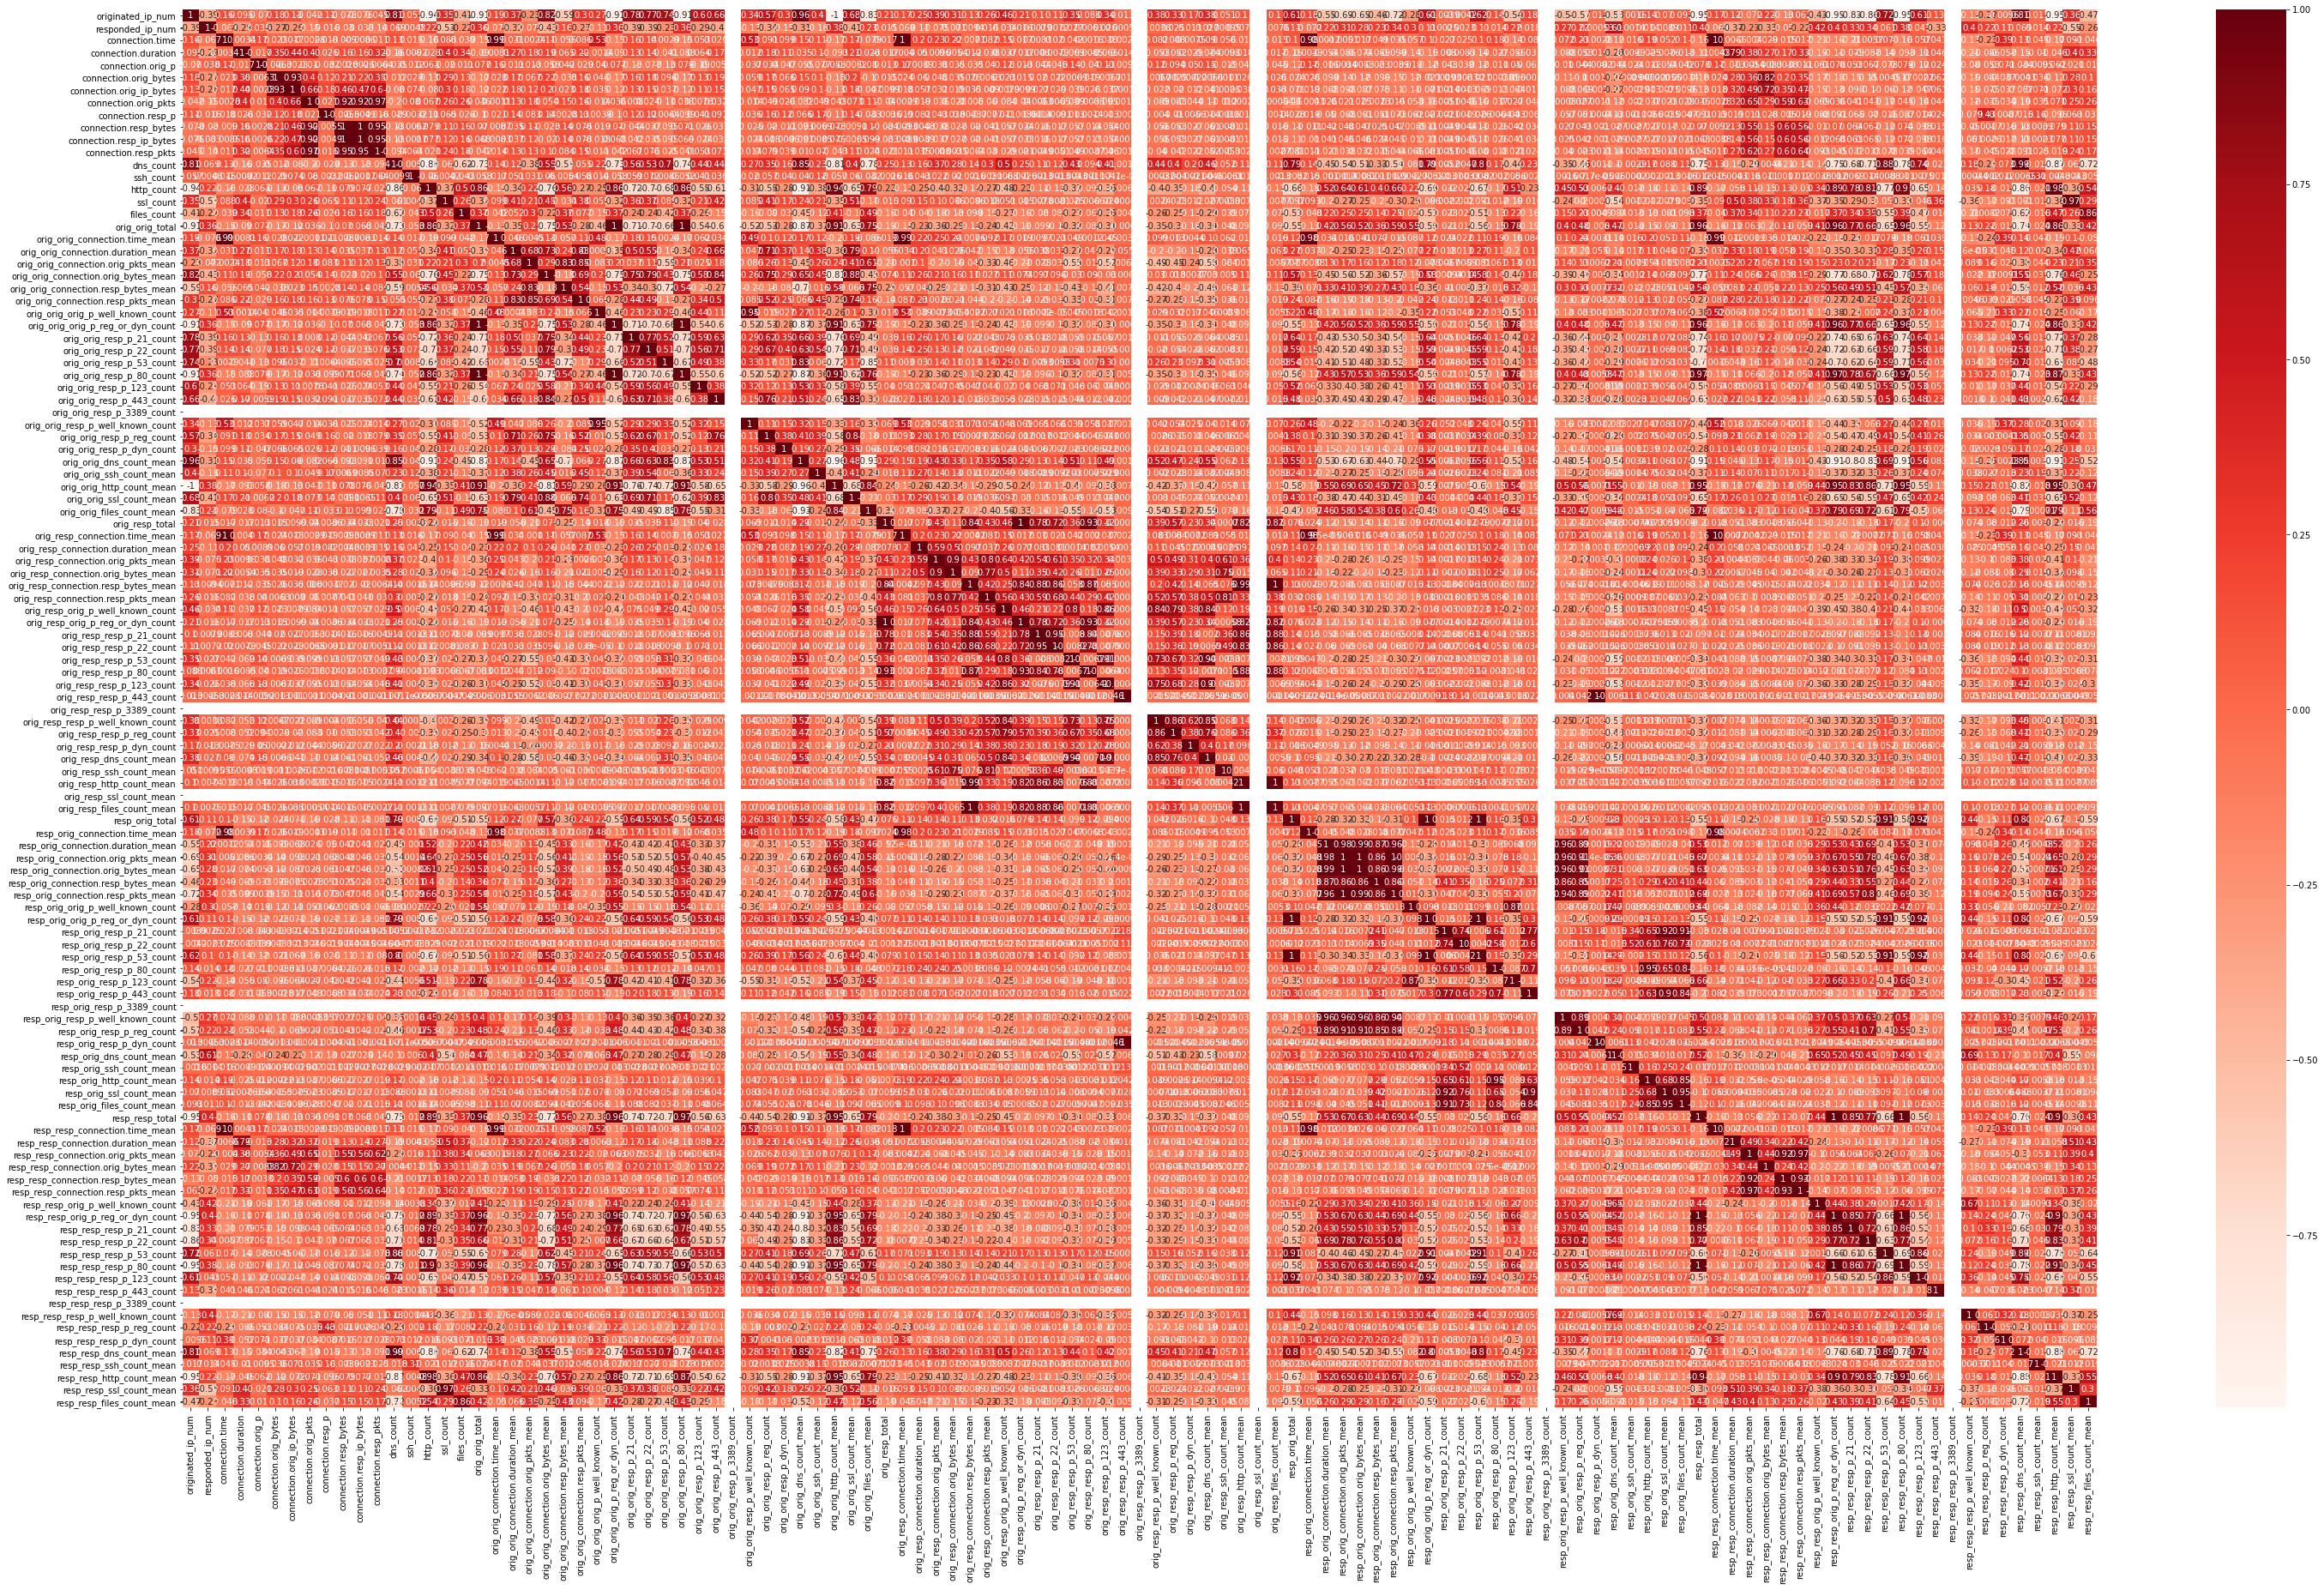

In [47]:
import seaborn as sns

# (https://medium.com/@sadievrenseker/preprocessing-end-to-end-data-preprocessing-1b0672087977)

plt.figure(figsize=(50,30))
cor = result_numerical.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## 5. Write the result to file

In [48]:
pd.reset_option('display.max_rows')

In [49]:
result_final = pd.concat([result, data_orig], axis=1)
result_final

originated_ip_num  responded_ip_num  connection.time  \
0                0.542027          0.802583         0.893343   
1                0.542027          0.285794         0.897758   
2                0.542027          0.047454         0.907008   
3                0.542027          1.000000         0.181584   
4                0.542027          0.857488         0.893324   
...                   ...               ...              ...   
116251           0.000000          0.857488         0.707325   
116252           0.000000          0.857488         0.707343   
116253           0.000000          0.857488         0.707360   
116254           0.000000          0.857488         0.706140   
116255           0.000000          0.857488         0.986340   

        connection.duration  connection.orig_p  connection.orig_bytes  \
0                  0.000622           0.818950               0.004096   
1                  0.035611           0.819454               0.006522   
2                  0.022898           0.819805               0.005139   
3                  0.000763           0.081643               0.007465   
4                  0.000024           0.817150               0.000340   
...                     ...                ...                    ...   
116251             0.001244           0.993285               0.000117   
116252             0.001221           0.993636               0.000117   
116253             0.001198           0.994003               0.000117   
116254             0.000085           0.783256               0.000117   
116255             0.018716           0.000000               0.001195   

        connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                       0.009215              0.010210           0.007650   
1                       0.010077              0.007374           0.007650   
2                       0.009047              0.007941           0.007650   
3                       0.011201              0.014748           0.092629   
4                       0.000638              0.001134           0.000900   
...                          ...                   ...                ...   
116251                  0.001746              0.003971           0.001367   
116252                  0.002193              0.005105           0.001367   
116253                  0.001522              0.003403           0.001367   
116254                  0.001074              0.002269           0.001367   
116255                  0.001768              0.002269           0.000000   

        connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                    0.001392                  0.001535              0.006759   
1                    0.000137                  0.000254              0.004771   
2                    0.000658                  0.000733              0.003579   
3                    0.000000                  0.000000              0.000000   
4                    0.000017                  0.000028              0.000795   
...                       ...                       ...                   ...   
116251               0.002242                  0.002232              0.001590   
116252               0.002242                  0.002232              0.001590   
116253               0.002242                  0.002247              0.002386   
116254               0.000000                  0.000017              0.000795   
116255               0.000000                  0.000000              0.000000   

        dns_count  ssh_count  http_count  ssl_count  files_count  \
0             0.0        0.0         0.0        1.0     0.086957   
1             0.0        0.0         0.0        1.0     0.000000   
2             0.0        0.0         0.0        1.0     0.086957   
3             1.0        0.0         0.0        0.0     0.000000   
4             1.0        0.0         0.0        0.0     0.000000   
...           ...        ...         ...        ...     

In [51]:
result_final.to_csv(PREFIX_PATH + 'final.csv', index=False, header=True)